## MNIST + PCA
---
- Feature 784개 ==> 주요 Feature로 압축

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 로딩 및 전처리

In [4]:
(x_train, y_train), (x_test, y_test)=load_data()

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
# 스케일링
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)

In [48]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## [2] MNIST의 PC(주성분 요소) 수 찾기
---

In [90]:
pca=PCA()

In [91]:
# 지정된 데이터에서 주성분 추출
pca.fit(x_train)

PCA()

In [92]:
# 주성분 행렬
len(pca.singular_values_)

784

In [93]:
# 주성분에 투영 후 분산 정도 설명
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.11687301e+00 3.74139084e+00 3.25270845e+00 2.84162070e+00
 2.56711774e+00 2.27366339e+00 1.72515498e+00 1.52056024e+00
 1.45630525e+00 1.24275009e+00 1.11208951e+00 1.06664054e+00
 9.04680833e-01 8.92181223e-01 8.32353048e-01 7.81900323e-01
 6.98386871e-01 6.73255811e-01 6.25995240e-01 6.07763020e-01
 5.62145880e-01 5.30798829e-01 5.02780255e-01 4.81147033e-01
 4.65783200e-01 4.42538691e-01 4.28439606e-01 4.14618707e-01
 3.92667337e-01 3.64261791e-01 3.46985958e-01 3.41741890e-01
 3.17734284e-01 3.09280821e-01 3.00549034e-01 2.86632712e-01
 2.66680512e-01 2.57227909e-01 2.53838022e-01 2.49006738e-01
 2.40823990e-01 2.34543854e-01 2.20658652e-01 2.09962678e-01
 2.02981381e-01 1.97776690e-01 1.90872477e-01 1.85379715e-01
 1.79298798e-01 1.69711256e-01 1.68204657e-01 1.64929264e-01
 1.56059568e-01 1.52353954e-01 1.49810350e-01 1.43117013e-01
 1.42107650e-01 1.36282013e-01 1.33802866e-01 1.29062999e-01
 1.26809057e-01 1.26153552e-01 1.21484982e-01 1.16804842e-01
 1.12686254e-01 1.092614

## 주성분 개수 지정

#### 방법 [1] : explained_variance_ratio 누적값으로 차원 수 계산

In [94]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'95% 주성분 개수(차원) : {d}')

95% 주성분 개수(차원) : 154


In [95]:
d_90=np.argmax(cumsum>=0.90)+1

print(f'90% 주성분 개수(차원) : {d_90}')

90% 주성분 개수(차원) : 87


In [23]:
# 지정된 PC 개수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [24]:
pca.fit(x_train_scaled)

PCA(n_components=331)

In [26]:
mnistPCA=pca.transform(x_train_scaled)

In [27]:
mnistPCA.shape

(60000, 331)

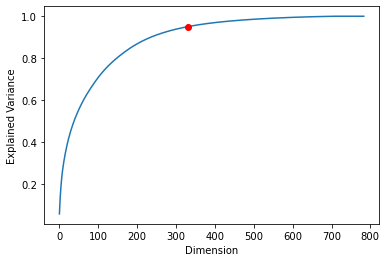

In [29]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

### 방법[2] : n_components = 비율값

In [66]:
# PC 객체 생성
pca_95=PCA(n_components=0.95)

In [83]:
# PC 계산
pca_95.fit(x_train)

PCA(n_components=0.95)

In [84]:
# PC 확인
pca_95.singular_values_

array([554.08236184, 473.79289646, 441.76832659, 412.90967564,
       392.45954891, 369.34743738, 321.72592959, 302.04650943,
       295.59576934, 273.06366032, 258.31039157, 252.97700677,
       232.98056847, 231.36547104, 223.47337767, 216.59463867,
       204.70103539, 200.98426661, 193.8016728 , 190.95856472,
       183.65236363, 178.45839561, 173.68452004, 169.90685928,
       167.17214551, 162.9474728 , 160.33074547, 157.72351701,
       153.49152274, 147.83552759, 144.28725   , 143.19277799,
       138.07150073, 136.22239172, 134.28567117, 131.13991042,
       126.49333601, 124.2313057 , 123.40999747, 122.22992796,
       120.20481924, 118.62713309, 115.06215042, 112.23881111,
       110.35705642, 108.93302362, 107.01475474, 105.46372614,
       103.71956692, 100.90840213, 100.45950025,  99.47658474,
        96.76475599,  95.60902108,  94.8075482 ,  92.66540711,
        92.3380578 ,  90.42557427,  89.59931997,  87.99801628,
        87.22623816,  87.0004999 ,  85.37550857,  83.71

In [86]:
mnistPCA_95=pca_95.transform(x_train)
mnistPCA_95.shape

(60000, 154)

In [87]:
# 압축된 피쳐 성분기반 원래 성분 복원
re_95=pca_95.inverse_transform(mnistPCA_95)
re_95.shape

(60000, 784)

#### 원본 사진 출력

In [73]:
# PCA 전후 이미지 비교
def drawimage(selectimg):
    plt.imshow(selectimg.reshape(28, 28), cmap='gray')
    plt.show()

#plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

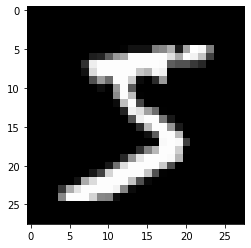

In [88]:
drawimage(x_train[0])

#### 95% 복원된 사진 출력

In [97]:
pca_90=PCA(n_components=0.90)

In [98]:
pca_90.fit(x_train)

PCA(n_components=0.9)

In [99]:
mnistPCA_90=pca_90.transform(x_train)

In [100]:
mnistPCA_90.shape

(60000, 87)

In [101]:
re_90=pca_90.inverse_transform(mnistPCA_90)
re_90.shape

(60000, 784)

Text(0.5, 1.0, '95%')

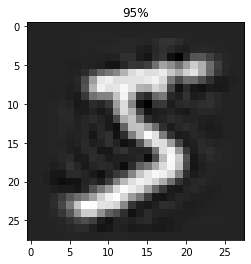

In [89]:
plt.imshow(re_95[0].reshape(28, 28), cmap='gray')
plt.title('95%')

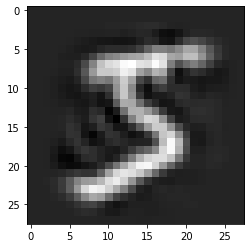

In [102]:
plt.imshow(re_90[0].reshape(28, 28), cmap='gray')